In [1]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

In [2]:
stock_list = ["AMZN", "MSFT", "AAPL", "GOOGL"]
end_date = datetime.now()
start_date = datetime(end_date.year - 1, end_date.month, end_date.day)


for stock in stock_list:
    globals()[stock] = data.DataReader(stock, "yahoo", start_date, end_date)

In [3]:
# Converting to CSV Files

AMZN.to_csv("amazon.csv")
MSFT.to_csv("microsoft.csv")
AAPL.to_csv("apple.csv")
GOOGL.to_csv("google.csv")

# For Amazon Stocks

In [4]:
amazon = pd.read_csv("amazon.csv")

In [5]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Open       252 non-null    float64
 4   Close      252 non-null    float64
 5   Volume     252 non-null    float64
 6   Adj Close  252 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.9+ KB


In [6]:
amazon.drop_duplicates()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-10-01,165.458496,162.796997,164.450500,164.162994,56712000.0,164.162994
1,2021-10-04,163.999496,158.812500,163.969498,159.488998,90462000.0,159.488998
2,2021-10-05,163.036499,160.123001,160.225006,161.050003,65384000.0,161.050003
3,2021-10-06,163.216995,159.931000,160.676498,163.100494,50660000.0,163.100494
4,2021-10-07,166.287506,164.153000,164.576996,165.121506,48182000.0,165.121506
...,...,...,...,...,...,...,...
247,2022-09-26,117.339996,113.129997,113.300003,115.150002,62723300.0,115.150002
248,2022-09-27,118.320000,113.050003,117.199997,114.410004,60094700.0,114.410004
249,2022-09-28,118.699997,113.800003,114.379997,118.010002,55763800.0,118.010002
250,2022-09-29,116.070000,113.059998,115.599998,114.800003,58969700.0,114.800003


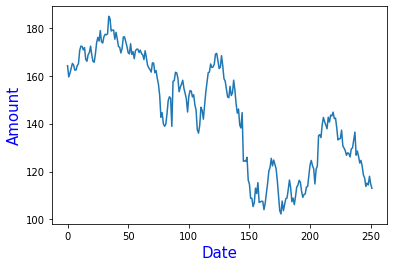

In [7]:
# What was the change in stock price over time?

amazon["Adj Close"].plot()
plt.xlabel("Date", size = 15, color = "blue")
plt.ylabel("Amount", size = 15, color = "blue")
plt.show()

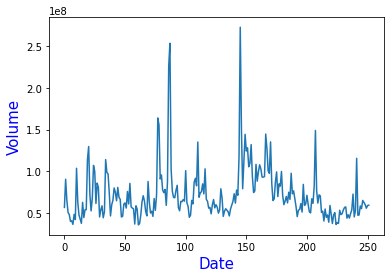

In [8]:
# Visualize the change in a stock’s volume being traded, over time?

amazon["Volume"].plot()
plt.xlabel("Date", size = 15, color = "blue")
plt.ylabel("Volume", size = 15, color = "blue")
plt.show()

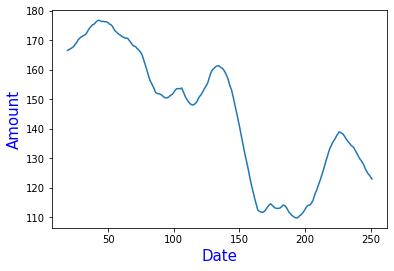

In [9]:
# What was the moving average of various stocks?

days = [20, 50, 100]
for day in days:
    column_name = "%s Days"%(str(day))
    amazon[column_name] = amazon["Adj Close"].rolling(window = day, center = False).mean()

amazon["20 Days"].plot()
plt.xlabel("Date", size = 15, color = "blue")
plt.ylabel("Amount", size = 15, color = "blue")
plt.show()

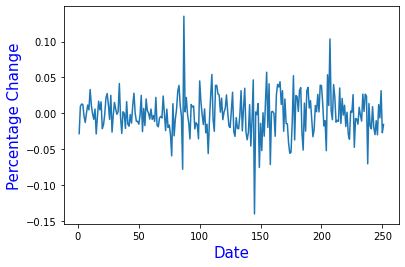

In [10]:
# What was the daily return average of a stock?

amazon["Daily Returns"] = amazon["Adj Close"].pct_change()
amazon["Daily Returns"].plot()
plt.xlabel("Date", size = 15, color = "blue")
plt.ylabel("Percentage Change", size = 15, color = "blue")
plt.show()

In [11]:
# Adda new column ‘Trend’ whose values are based on the 'Daily Return'.

amazon["Trend"] = np.nan

for i in range(1, len(amazon["Daily Returns"])):
    if amazon.loc[i, "Daily Returns"] >= -0.0015 and amazon.loc[i, "Daily Returns"] < 0.015:
        amazon.loc[i, "Trend"] = "No Change"
    elif amazon.loc[i, "Daily Returns"] < -0.0015 and amazon.loc[i, "Daily Returns"] > -0.02:
        amazon.loc[i, "Trend"] = "Slightly Negative"
    elif amazon.loc[i, "Daily Returns"] < -0.02:
        amazon.loc[i, "Trend"] = "Completely Negative"
    elif amazon.loc[i, "Daily Returns"] >= 0.015 and amazon.loc[i, "Daily Returns"] < 0.02:
        amazon.loc[i, "Trend"] = "Slightly Positive"
    else:
        amazon.loc[i, "Trend"] = "Completely Positive"

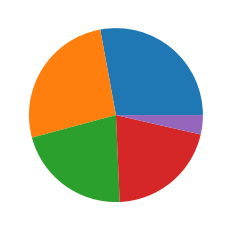

In [12]:
# Visualize trend frequency through a Pie Chart.

plt.pie(amazon["Trend"].value_counts())
plt.show()

# For Microsoft Stocks

In [13]:
microsoft = pd.read_csv("microsoft.csv")

In [14]:
microsoft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Open       252 non-null    float64
 4   Close      252 non-null    float64
 5   Volume     252 non-null    float64
 6   Adj Close  252 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.9+ KB


In [15]:
microsoft.drop_duplicates()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-10-01,289.980011,281.290009,282.119995,289.100006,30086300.0,286.698883
1,2021-10-04,287.750000,280.250000,287.399994,283.109985,31350700.0,280.758606
2,2021-10-05,290.399994,284.049988,284.049988,288.760010,24993000.0,286.361725
3,2021-10-06,293.630005,285.510010,285.779999,293.109985,28002600.0,290.675568
4,2021-10-07,296.640015,293.920013,295.179993,294.850006,20430500.0,292.401123
...,...,...,...,...,...,...,...
247,2022-09-26,241.449997,236.899994,237.050003,237.449997,27694200.0,237.449997
248,2022-09-27,241.800003,234.500000,239.979996,236.410004,27018700.0,236.410004
249,2022-09-28,242.330002,234.729996,236.809998,241.070007,29029700.0,241.070007
250,2022-09-29,239.949997,234.410004,238.889999,237.500000,27484200.0,237.500000


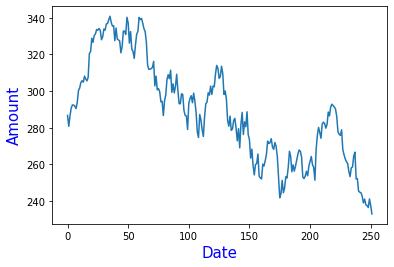

In [16]:
# What was the change in stock price over time?

microsoft["Adj Close"].plot()
plt.xlabel("Date", size = 15, color = "blue")
plt.ylabel("Amount", size = 15, color = "blue")
plt.show()

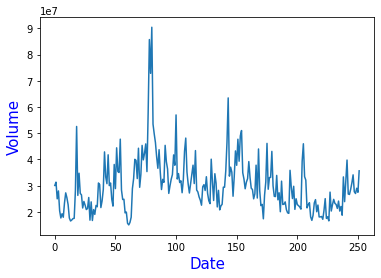

In [17]:
# Visualize the change in a stock’s volume being traded, over time?

microsoft["Volume"].plot()
plt.xlabel("Date", size = 15, color = "blue")
plt.ylabel("Volume", size = 15, color = "blue")
plt.show()

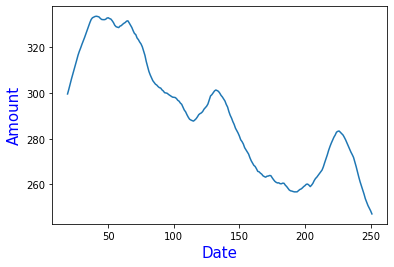

In [18]:
# What was the moving average of various stocks?

days = [20, 50, 100]
for day in days:
    column_name = "%s Days"%(str(day))
    microsoft[column_name] = microsoft["Adj Close"].rolling(window = day, center = False).mean()

microsoft["20 Days"].plot()
plt.xlabel("Date", size = 15, color = "blue")
plt.ylabel("Amount", size = 15, color = "blue")
plt.show()

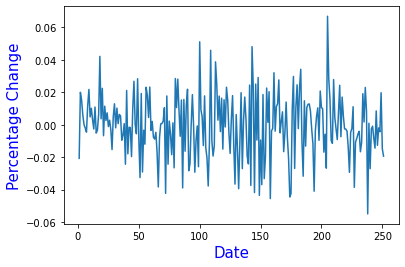

In [19]:
# What was the daily return average of a stock?

microsoft["Daily Returns"] = microsoft["Adj Close"].pct_change()
microsoft["Daily Returns"].plot()
plt.xlabel("Date", size = 15, color = "blue")
plt.ylabel("Percentage Change", size = 15, color = "blue")
plt.show()

In [20]:
# Adda new column ‘Trend’ whose values are based on the 'Daily Return'.

microsoft["Trend"] = np.nan

for i in range(1, len(microsoft["Daily Returns"])):
    if microsoft.loc[i, "Daily Returns"] >= -0.0015 and microsoft.loc[i, "Daily Returns"] < 0.015:
        microsoft.loc[i, "Trend"] = "No Change"
    elif microsoft.loc[i, "Daily Returns"] < -0.0015 and microsoft.loc[i, "Daily Returns"] > -0.02:
        microsoft.loc[i, "Trend"] = "Slightly Negative"
    elif microsoft.loc[i, "Daily Returns"] < -0.02:
        microsoft.loc[i, "Trend"] = "Completely Negative"
    elif microsoft.loc[i, "Daily Returns"] >= 0.015 and microsoft.loc[i, "Daily Returns"] < 0.02:
        microsoft.loc[i, "Trend"] = "Slightly Positive"
    else:
        microsoft.loc[i, "Trend"] = "Completely Positive"

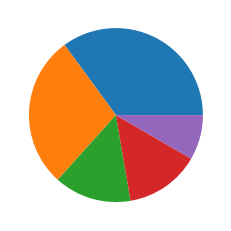

In [21]:
# Visualize trend frequency through a Pie Chart.

plt.pie(microsoft["Trend"].value_counts())
plt.show()

# For Apple Stocks

In [22]:
apple = pd.read_csv("apple.csv")

In [23]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Open       252 non-null    float64
 4   Close      252 non-null    float64
 5   Volume     252 non-null    float64
 6   Adj Close  252 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.9+ KB


In [24]:
apple.drop_duplicates()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-10-01,142.919998,139.110001,141.899994,142.649994,94639600.0,141.855087
1,2021-10-04,142.210007,138.270004,141.759995,139.139999,98322000.0,138.364655
2,2021-10-05,142.240005,139.360001,139.490005,141.110001,80861100.0,140.323669
3,2021-10-06,142.149994,138.369995,139.470001,142.000000,83221100.0,141.208725
4,2021-10-07,144.220001,142.720001,143.059998,143.289993,61732700.0,142.491531
...,...,...,...,...,...,...,...
247,2022-09-26,153.770004,149.639999,149.660004,150.770004,93339400.0,150.770004
248,2022-09-27,154.720001,149.949997,152.740005,151.759995,84442700.0,151.759995
249,2022-09-28,150.639999,144.839996,147.639999,149.839996,146691400.0,149.839996
250,2022-09-29,146.720001,140.679993,146.100006,142.479996,128138200.0,142.479996


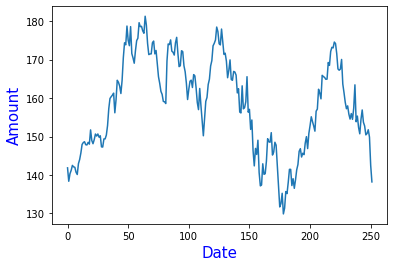

In [25]:
# What was the change in stock price over time?

apple["Adj Close"].plot()
plt.xlabel("Date", size = 15, color = "blue")
plt.ylabel("Amount", size = 15, color = "blue")
plt.show()

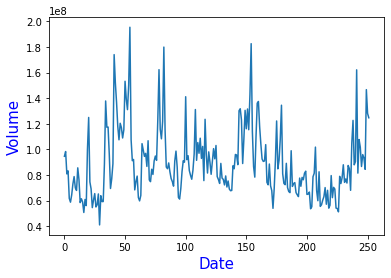

In [26]:
# Visualize the change in a stock’s volume being traded, over time?

apple["Volume"].plot()
plt.xlabel("Date", size = 15, color = "blue")
plt.ylabel("Volume", size = 15, color = "blue")
plt.show()

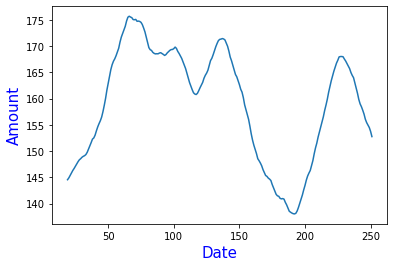

In [27]:
# What was the moving average of various stocks?

days = [20, 50, 100]
for day in days:
    column_name = "%s Days"%(str(day))
    apple[column_name] = apple["Adj Close"].rolling(window = day, center = False).mean()

apple["20 Days"].plot()
plt.xlabel("Date", size = 15, color = "blue")
plt.ylabel("Amount", size = 15, color = "blue")
plt.show()

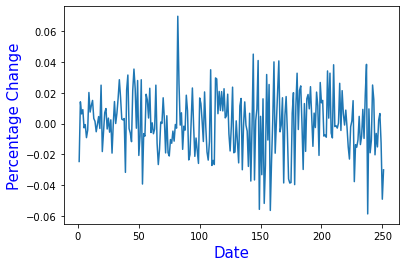

In [28]:
# What was the daily return average of a stock?

apple["Daily Returns"] = apple["Adj Close"].pct_change()
apple["Daily Returns"].plot()
plt.xlabel("Date", size = 15, color = "blue")
plt.ylabel("Percentage Change", size = 15, color = "blue")
plt.show()

In [29]:
# Adda new column ‘Trend’ whose values are based on the 'Daily Return'.

apple["Trend"] = np.nan

for i in range(1, len(apple["Daily Returns"])):
    if apple.loc[i, "Daily Returns"] >= -0.0015 and apple.loc[i, "Daily Returns"] < 0.015:
        apple.loc[i, "Trend"] = "No Change"
    elif apple.loc[i, "Daily Returns"] < -0.0015 and apple.loc[i, "Daily Returns"] > -0.02:
        apple.loc[i, "Trend"] = "Slightly Negative"
    elif apple.loc[i, "Daily Returns"] < -0.02:
        apple.loc[i, "Trend"] = "Completely Negative"
    elif apple.loc[i, "Daily Returns"] >= 0.015 and apple.loc[i, "Daily Returns"] < 0.02:
        apple.loc[i, "Trend"] = "Slightly Positive"
    else:
        apple.loc[i, "Trend"] = "Completely Positive"

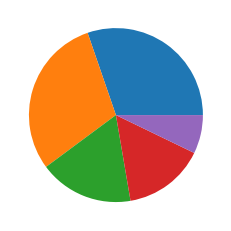

In [30]:
# Visualize trend frequency through a Pie Chart.

plt.pie(apple["Trend"].value_counts())
plt.show()

# For Google Stocks

In [31]:
google = pd.read_csv("google.csv")

In [32]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Open       252 non-null    float64
 4   Close      252 non-null    float64
 5   Volume     252 non-null    float64
 6   Adj Close  252 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.9+ KB


In [33]:
google.drop_duplicates()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-10-01,136.910507,134.072998,134.447495,136.542999,35360000.0,136.542999
1,2021-10-04,135.960495,131.050003,135.960495,133.659500,51202000.0,133.659500
2,2021-10-05,137.224503,134.041000,134.041000,136.022995,32404000.0,136.022995
3,2021-10-06,137.750000,134.550003,134.750000,137.565002,24364000.0,137.565002
4,2021-10-07,140.042007,138.651001,138.891998,139.225006,25110000.0,139.225006
...,...,...,...,...,...,...,...
247,2022-09-26,99.879997,97.800003,98.099998,98.169998,27072700.0,98.169998
248,2022-09-27,100.000000,96.870003,99.430000,97.500000,30072800.0,97.500000
249,2022-09-28,100.699997,97.110001,97.650002,100.050003,32466300.0,100.050003
250,2022-09-29,98.639999,95.959999,98.639999,97.419998,31047200.0,97.419998


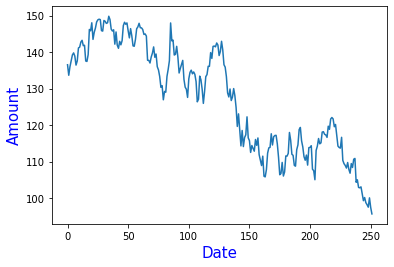

In [34]:
# What was the change in stock price over time?

google["Adj Close"].plot()
plt.xlabel("Date", size = 15, color = "blue")
plt.ylabel("Amount", size = 15, color = "blue")
plt.show()

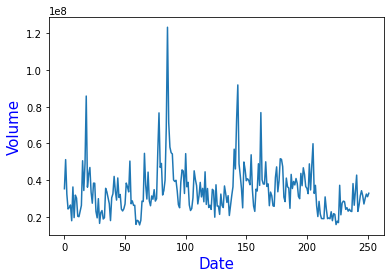

In [35]:
# Visualize the change in a stock’s volume being traded, over time?

google["Volume"].plot()
plt.xlabel("Date", size = 15, color = "blue")
plt.ylabel("Volume", size = 15, color = "blue")
plt.show()

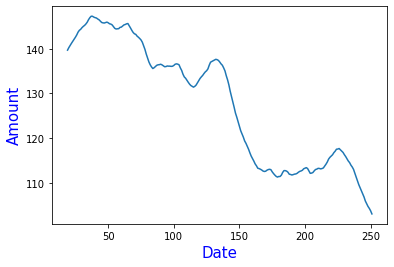

In [36]:
# What was the moving average of various stocks?

days = [20, 50, 100]
for day in days:
    column_name = "%s Days"%(str(day))
    google[column_name] = google["Adj Close"].rolling(window = day, center = False).mean()

google["20 Days"].plot()
plt.xlabel("Date", size = 15, color = "blue")
plt.ylabel("Amount", size = 15, color = "blue")
plt.show()

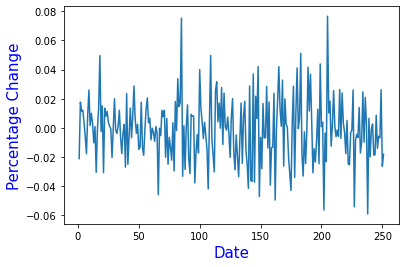

In [37]:
# What was the daily return average of a stock?

google["Daily Returns"] = google["Adj Close"].pct_change()
google["Daily Returns"].plot()
plt.xlabel("Date", size = 15, color = "blue")
plt.ylabel("Percentage Change", size = 15, color = "blue")
plt.show()

In [38]:
# Adda new column ‘Trend’ whose values are based on the 'Daily Return'.

google["Trend"] = np.nan

for i in range(1, len(google["Daily Returns"])):
    if google.loc[i, "Daily Returns"] >= -0.0015 and google.loc[i, "Daily Returns"] < 0.015:
        google.loc[i, "Trend"] = "No Change"
    elif google.loc[i, "Daily Returns"] < -0.0015 and google.loc[i, "Daily Returns"] > -0.02:
        google.loc[i, "Trend"] = "Slightly Negative"
    elif google.loc[i, "Daily Returns"] < -0.02:
        google.loc[i, "Trend"] = "Completely Negative"
    elif google.loc[i, "Daily Returns"] >= 0.015 and google.loc[i, "Daily Returns"] < 0.02:
        google.loc[i, "Trend"] = "Slightly Positive"
    else:
        google.loc[i, "Trend"] = "Completely Positive"

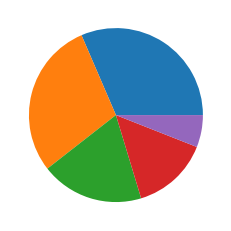

In [39]:
# Visualize trend frequency through a Pie Chart.

plt.pie(google["Trend"].value_counts())
plt.show()

# Combined Analysis

In [40]:
# What was the correlation between the daily returns of different stocks?


combined = pd.DataFrame({"Amazon" : amazon["Adj Close"],
                        "Microsoft": microsoft["Adj Close"],
                        "Apple": apple["Adj Close"],
                        "Google": google["Adj Close"]})

In [41]:
for i in combined:
    combined["%s Daily Returns"%(i)] = combined[i].pct_change()

<AxesSubplot:>

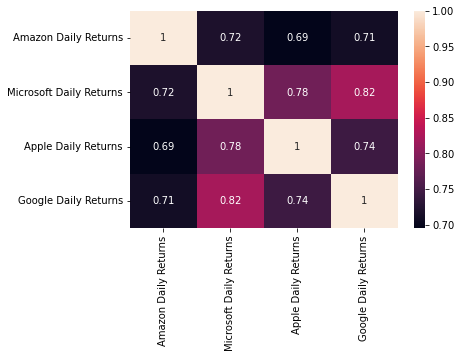

In [42]:
sns.heatmap(combined.iloc[:, 4:].corr(), annot = True)